In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import seaborn 
import pylab as pl
import statsmodels.api as sm
from statsmodels.formula.api import ols

if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")

%pylab inline

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
os.getenv('PUIDATA')


'/home/cusp/nm2565/PUIdata'

In [3]:
!wget https://github.com/fedhere/PUI2016_fb55/blob/master/HW9_fb55/MTA_Fare.npy?raw=true

--2016-11-23 11:18:54--  https://github.com/fedhere/PUI2016_fb55/blob/master/HW9_fb55/MTA_Fare.npy?raw=true
Resolving github.com... 192.30.253.112, 192.30.253.113
Connecting to github.com|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/fedhere/PUI2016_fb55/raw/master/HW9_fb55/MTA_Fare.npy [following]
--2016-11-23 11:18:54--  https://github.com/fedhere/PUI2016_fb55/raw/master/HW9_fb55/MTA_Fare.npy
Connecting to github.com|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fedhere/PUI2016_fb55/master/HW9_fb55/MTA_Fare.npy [following]
--2016-11-23 11:18:54--  https://raw.githubusercontent.com/fedhere/PUI2016_fb55/master/HW9_fb55/MTA_Fare.npy
Resolving raw.githubusercontent.com... 151.101.20.133
Connecting to raw.githubusercontent.com|151.101.20.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10708880 (10M) [application/

In [4]:
os.system('mv MTA_Fare.npy?raw=true ' + os.getenv('PUIDATA') + '/MTA_Fare.npy')

0

In [5]:

mta = np.load(os.getenv('PUIDATA') + '/' + 'MTA_Fare.npy')

In [6]:
mta

array([[[56961, 64703, 68002, ..., 36527, 33929, 36824],
        [ 1732,  2083,  2107, ...,  1264,  1172,  1238],
        [  203,   276,   245, ...,   186,   167,   167],
        ..., 
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [   -1,    -1,    -1, ...,  1121,  1377,   712]],

       [[16210, 20179, 21769, ...,    -1,    -1,    -1],
        [  503,   647,   665, ...,    -1,    -1,    -1],
        [   41,    43,    44, ...,    -1,    -1,    -1],
        ..., 
        [    0,     0,     0, ...,    -1,    -1,    -1],
        [    0,     0,     0, ...,    -1,    -1,    -1],
        [   -1,    -1,    -1, ...,    -1,    -1,    -1]],

       [[ 3292,  3429,  3629, ...,  3746,  3406,  3217],
        [  110,    92,   102, ...,   212,   209,   211],
        [    7,     6,    13, ...,    26,    20,    22],
        ..., 
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0, 

In [7]:
mta.shape

(600, 23, 194)

In [8]:
#this is a 3 dimensional data where 600 is the number of stations, 23 is the different types of cards and 194 is the 
#number of weeks.

In [9]:
mta[0]

array([[56961, 64703, 68002, ..., 36527, 33929, 36824],
       [ 1732,  2083,  2107, ...,  1264,  1172,  1238],
       [  203,   276,   245, ...,   186,   167,   167],
       ..., 
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       [   -1,    -1,    -1, ...,  1121,  1377,   712]], dtype=int32)

In [10]:
len (mta[0])

23

In [11]:
mta[0][1]

array([1732, 2083, 2107, 2188, 2314, 1921, 2072, 1999, 2031, 1980, 2104,
       2079, 1868, 1974, 1933, 1944, 1934, 1607, 1832, 1768, 1791, 1797,
       1756, 1802, 1906, 1446, 1838, 1820, 1754, 1499, 1016, 1016, 1689,
       1557, 1299, 1297, 1536, 1734, 1777, 1511, 1843, 1784, 1924, 1701,
       1816, 2030, 1962, 1765, 1968, 2008, 2070, 2022, 2115, 2062, 2176,
       2237, 2455, 2417, 2216, 2011, 2063, 2412, 2397, 2136, 2206, 1731,
       2028, 2277, 2259, 1827, 2221, 2206, 2214, 2066, 2212, 2218, 2118,
       1656, 2289, 2159, 2078, 1927, 1613, 1701, 2031, 1727, 1870, 1968,
       1994, 1882, 1908, 1965, 2017, 2089, 2123, 1621, 2021, 2091, 2561,
       2327, 2334, 2436, 2193, 2323, 2626, 2590, 2540, 2552, 2780, 2189,
       2621, 2471, 2585, 2555, 2587, 2744, 2562, 2518, 2446, 2604, 2604,
       2562, 2565, 2325, 2337, 2500,  255,    0,   -1,   -1,    0,  460,
        560,  562,  799,  980, 1124, 1179, 1041, 1017, 1130, 1176, 1138,
       1285, 1285, 1453, 1331, 1328, 1600, 2057, 16

In [12]:
len (mta[0][1])

194

In [13]:
len (mta)

600

In [14]:
mta = mta.astype(float)

In [15]:
#missing values are represented as -1

In [16]:
mta[mta == -1] = np.nan

In [17]:
# 1. Identifying the most prominent event

In [18]:
#np.nansum Return the sum of array elements over a given axis treating Not a Numbers (NaNs) as zero.
mta_all = np.nansum(mta, axis=1)

In [19]:
print(mta_all.shape)

(600, 194)


In [ ]:
#2 dimensional

In [20]:
len(mta_all)

600

In [21]:
mta_all_sum = np.nansum(mta_all, axis=0)

In [22]:
print(mta_all_sum.shape)

(194,)


In [23]:
r_shipavg = np.mean(mta_all_sum)
print(r_shipavg)

29781349.8711


In [24]:
r_shipstd = np.std(mta_all_sum)
print(r_shipstd)

2983960.4217


In [25]:
#Event detection:
#Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
#Identify it, figure out the date (you know when the data starts and what the cadence is) and figure out what it is due to.

In [26]:
lowseg = r_shipavg - 3 * r_shipstd
highseg = r_shipavg + 3 * r_shipstd
print(lowseg)
print(highseg)

20829468.606
38733231.1362


In [27]:
event = np.where(mta_all_sum < lowseg)
print(event)

(array([126]),)


In [28]:
print(mta_all_sum[126])

5218686.0


In [29]:
np.where(mta_all_sum > highseg)

(array([], dtype=int64),)

In [30]:
date = pd.date_range(start=pd.datetime(2010, 5, 28), periods=194, freq='w-Fri')

In [31]:
date

DatetimeIndex(['2010-05-28', '2010-06-04', '2010-06-11', '2010-06-18',
               '2010-06-25', '2010-07-02', '2010-07-09', '2010-07-16',
               '2010-07-23', '2010-07-30',
               ...
               '2013-12-06', '2013-12-13', '2013-12-20', '2013-12-27',
               '2014-01-03', '2014-01-10', '2014-01-17', '2014-01-24',
               '2014-01-31', '2014-02-07'],
              dtype='datetime64[ns]', length=194, freq='W-FRI')

In [32]:
weeks = pd.DataFrame()
weeks['Weekly Ridership Count'] = mta_all_sum
weeks = weeks.set_index(date)
weeks['Week Number'] = [i for i in range(0,len(mta_all_sum))]

In [33]:
weeks.loc[weeks['Week Number'] == 126]

,Weekly Ridership Count,Week Number
2012-10-26,5218686.0,126


In [34]:
weeks.loc[weeks['Week Number'] == 0]

,Weekly Ridership Count,Week Number
2010-05-28,26720267.0,0


In [35]:
mta_all_sum[126]

5218686.0

In [36]:
mta_all_sum[0]

26720267.0

The low ridership levels recorded on the week of October 19, 2012 is due to Hurricane Sandy. This assertion, however, 
assumes the MTA only has information of 194 out of 196 weeks from May, 21 2010 to February 21, 2012. 

Task 2:
Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the ridership types that have steadily increased in popularity, and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)

In [37]:
mta_ridetypesum = np.nansum(mta, axis=0)

In [38]:
mta_ridetypesum.shape

(23, 194)

In [39]:
mta_ridetypesum[0]

array([ 11494615.,  12526859.,  12766627.,  12653675.,  12809694.,
        11429783.,  12346877.,  12576759.,  12437115.,  12431257.,
        12401572.,  12280641.,  11913505.,  12391812.,  11878127.,
        12918455.,  12812272.,  12292468.,  12662413.,  12400611.,
        12721967.,  12633600.,  12648413.,  12699903.,  12767910.,
        11074280.,  12651006.,  13210412.,  13306773.,  12600160.,
        10897611.,  10891186.,  12679761.,  12143325.,  11754961.,
        11912201.,  13216489.,  13164779.,  13382528.,  12154310.,
        13055840.,  13215534.,  13518602.,  13262819.,  13186542.,
        13534859.,  13589465.,  13007162.,  13178854.,  13739517.,
        13741510.,  13791231.,  12620609.,  13847203.,  14028576.,
        13939790.,  14440960.,  12781306.,  14120142.,  13830819.,
        13753535.,  13922835.,  13823650.,  13364902.,  13271985.,
        11175879.,  13699219.,  14184755.,  14332556.,  10985709.,
        14021552.,  13566791.,  14183762.,  14252376.,  138914

In [40]:
mta_ridetypesum[0][193]

12459947.0

In [41]:
print(len(mta_ridetypesum))

23


In [42]:
percentages = []
for k in range(0,194): #loops through each of the 194 stations
    divided = mta_ridetypesum[:,k] / mta_all_sum[k] 
    percentages.append(divided)
    k+=1  

In [43]:
print(len(mta_ridetypesum))

23


In [44]:
percentages = np.asarray(percentages)
percentages.shape

(194, 23)

In [45]:
percentages

array([[  4.30183389e-01,   1.98547417e-02,   1.78894170e-03, ...,
          2.29339026e-04,   1.33980697e-05,   0.00000000e+00],
       [  4.28034969e-01,   1.99389591e-02,   1.75924455e-03, ...,
          2.09116588e-04,   1.61962848e-05,   0.00000000e+00],
       [  4.31287642e-01,   1.98030559e-02,   1.74438939e-03, ...,
          2.19247950e-04,   1.57088285e-05,   0.00000000e+00],
       ..., 
       [  4.14525673e-01,   2.18468089e-02,   1.84706662e-03, ...,
          1.69649412e-04,   2.70911066e-05,   3.55994426e-02],
       [  4.03843909e-01,   2.16520901e-02,   1.82607172e-03, ...,
          1.86047714e-04,   2.61675027e-05,   4.45623849e-02],
       [  4.21865975e-01,   2.30062507e-02,   1.86867785e-03, ...,
          2.09376428e-04,   2.77633685e-05,   1.81145145e-02]])

In [46]:
#average usage for first 10 weeks per card
first10avg = []
for i in range(0,23):
    first10avg.append([np.sum(percentages[:,i][0:10]) / 10])

In [47]:
print(first10avg)

[[0.4323758332138799], [0.018667879914906437], [0.001747888774052175], [0.0066771984615906846], [0.0016809924695701049], [0.1377988203571609], [0.31921905128417161], [0.00038445715784217666], [0.011499455022934802], [0.020970967982928107], [0.0014416294491197837], [0.0046142340963523194], [2.0149192786130862e-07], [0.0047993768693420091], [0.029531165859038498], [0.0022565820764281789], [0.0010920669776073161], [1.5862125688679772e-05], [0.0042370026074303865], [0.00074052545834824609], [0.00023214493048325028], [1.6663419196558629e-05], [0.0]]


In [48]:
#average usage for last 10 weeks per card
last10avg = []
for i in range(0,23):
    last10avg.append([np.sum(percentages[:,i][184:]) / 10])

In [49]:
print(last10avg)

[[0.42486319148923801], [0.02241711221425282], [0.0018649674754867968], [0.005993728087443086], [0.0016359719489394387], [0.18469016252295994], [0.27426700469108073], [7.5001053141189809e-08], [1.1986040162549634e-07], [3.1234335191217004e-08], [0.0011225143010573295], [0.0053331510412701717], [0.0048449949884155326], [0.0026290407299293206], [0.018320167354906304], [0.0055663354538111991], [0.0030260589267161911], [0.001101266026220796], [0.0063353579037410237], [0.00072973476735097432], [0.00018290667630431766], [2.656074433966059e-05], [0.035049546560746478]]


In [50]:
first10avg = np.asarray(first10avg)
last10avg = np.asarray(last10avg)

In [51]:
ratt = last10avg / first10avg

In [52]:
#ridership ratio per type of card
ridertype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])
riderdict = dict(zip(ridertype, ratt))
print(riderdict)

{'7d': array([ 1.34028841]), 'month': array([ 0.54778793]), '14d': array([ 1.20083868]), 'ez': array([  1.48940837e-06]), 'sen': array([ 2.77094628]), '30d': array([ 0.97321789]), '10t': array([ 0.98262474]), 'rr': array([ 2.46671083]), '1d': array([ 1.06698292]), 'stud': array([ inf]), 'ada': array([ 0.85918119]), 'spec': array([ 69.42739251]), 'exp': array([  1.04231376e-05]), 'ff': array([ 0.77864274]), 'tcmc': array([ 1.49524522]), '2t': array([ 0.89764115]), 'mc': array([ 1.15580418]), 'afas': array([ 0.00019508]), 't': array([ 0.98542833]), 'xbus': array([ 1.59395524]), 'mr': array([ 24045.6034137]), 'umlim': array([ 0.78789865]), 'rfm': array([ 0.62036722])}


In [53]:
riderdict = dict( (key, value) for (key, value) in riderdict.items() if value > 1.05 or value < .95 )

In [54]:
print(riderdict)

{'2t': array([ 0.89764115]), 'xbus': array([ 1.59395524]), '7d': array([ 1.34028841]), 'exp': array([  1.04231376e-05]), 'rr': array([ 2.46671083]), 'ff': array([ 0.77864274]), 'umlim': array([ 0.78789865]), 'tcmc': array([ 1.49524522]), 'ada': array([ 0.85918119]), 'mc': array([ 1.15580418]), 'month': array([ 0.54778793]), '14d': array([ 1.20083868]), 'afas': array([ 0.00019508]), '1d': array([ 1.06698292]), 'stud': array([ inf]), 'ez': array([  1.48940837e-06]), 'sen': array([ 2.77094628]), 'mr': array([ 24045.6034137]), 'spec': array([ 69.42739251]), 'rfm': array([ 0.62036722])}


In [55]:
df1 = pd.DataFrame(mta_ridetypesum).T

In [56]:
df1.columns

RangeIndex(start=0, stop=23, step=1)

In [57]:
df1 = df1.set_index(pd.DatetimeIndex(date))
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
2010-05-28,11494615.0,530524.0,47801.0,186551.0,46808.0,3697443.0,8551937.0,10063.0,333197.0,512032.0,...,123134.0,790110.0,59809.0,28221.0,0.0,124693.0,21060.0,6128.0,358.0,0.0
2010-06-04,12526859.0,583533.0,51486.0,199229.0,64353.0,3981808.0,9486394.0,11847.0,282755.0,578023.0,...,151948.0,908068.0,69209.0,32333.0,0.0,121713.0,21670.0,6120.0,474.0,0.0
2010-06-11,12766627.0,586194.0,51636.0,199668.0,56994.0,4033030.0,9476538.0,12277.0,302028.0,615537.0,...,151538.0,914124.0,69574.0,32618.0,0.0,122181.0,21433.0,6490.0,465.0,0.0
2010-06-18,12653675.0,562602.0,52063.0,196389.0,37429.0,4032753.0,9450081.0,11221.0,305513.0,606270.0,...,147094.0,902549.0,68099.0,32404.0,0.0,122051.0,21630.0,6590.0,484.0,0.0
2010-06-25,12809694.0,548858.0,51153.0,194883.0,35210.0,3925446.0,9294002.0,10515.0,335780.0,563446.0,...,137888.0,855573.0,66377.0,31933.0,176.0,119776.0,20297.0,6313.0,452.0,0.0


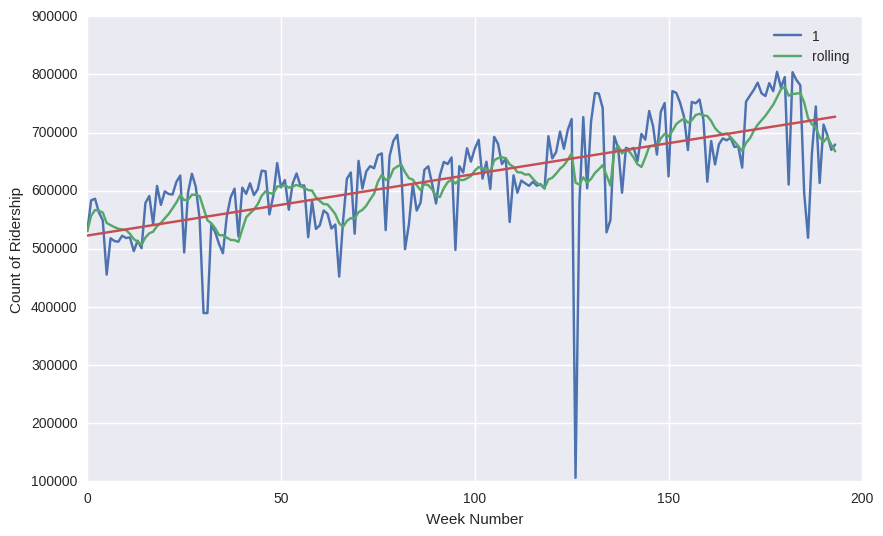

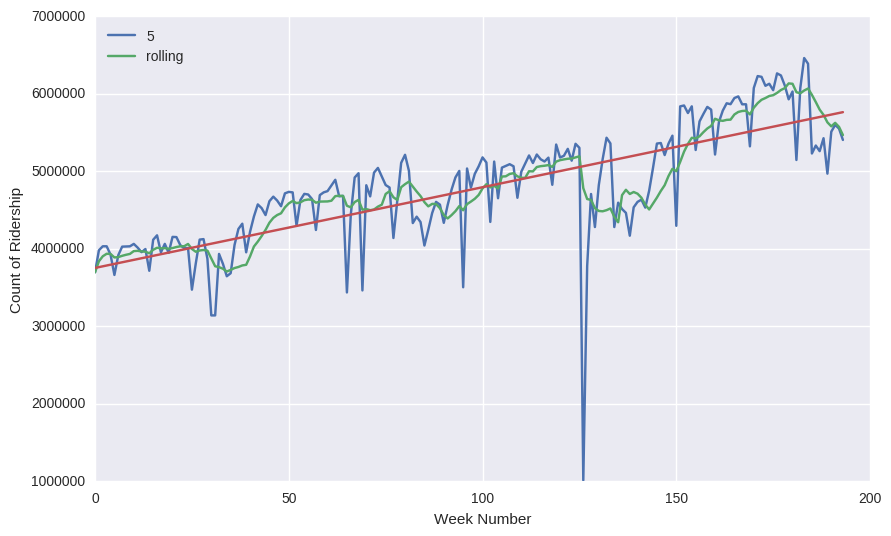

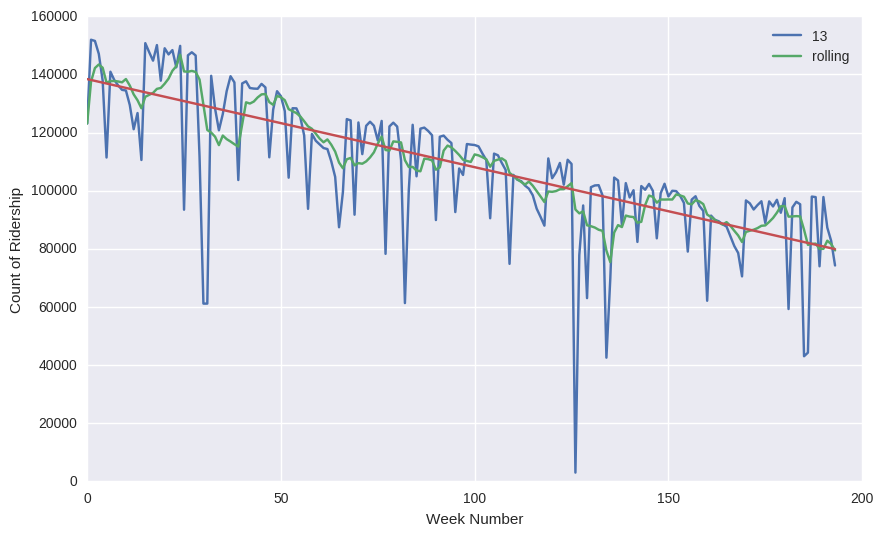

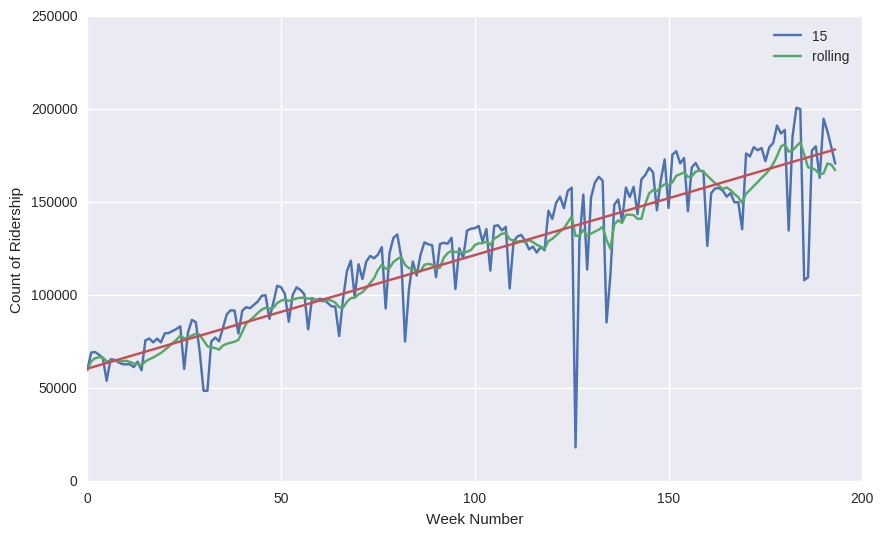

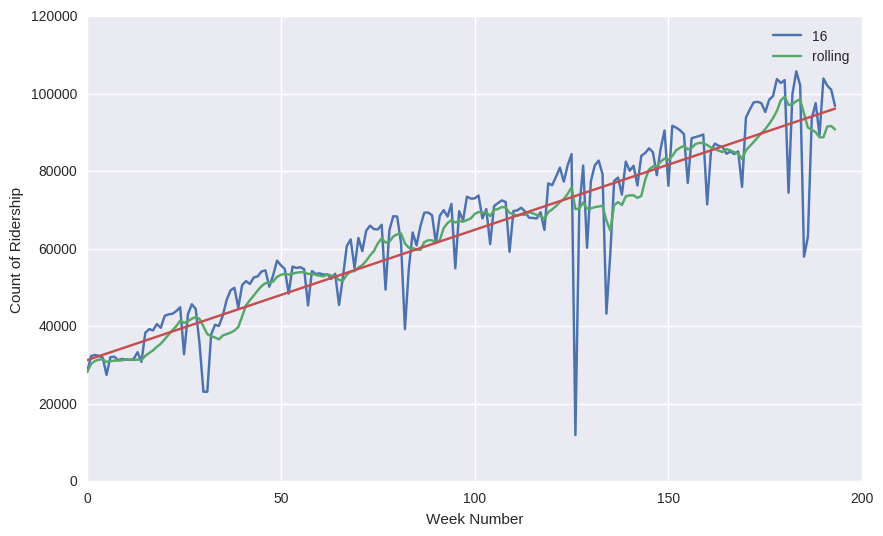

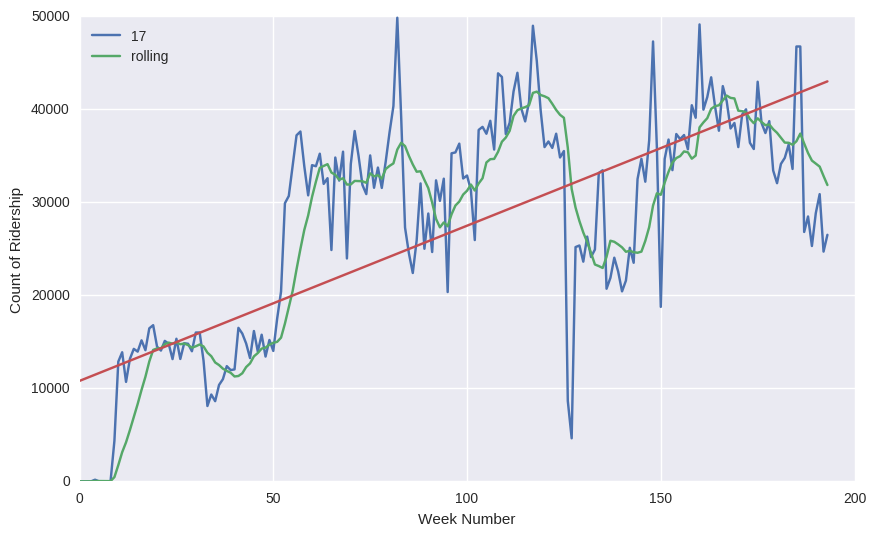

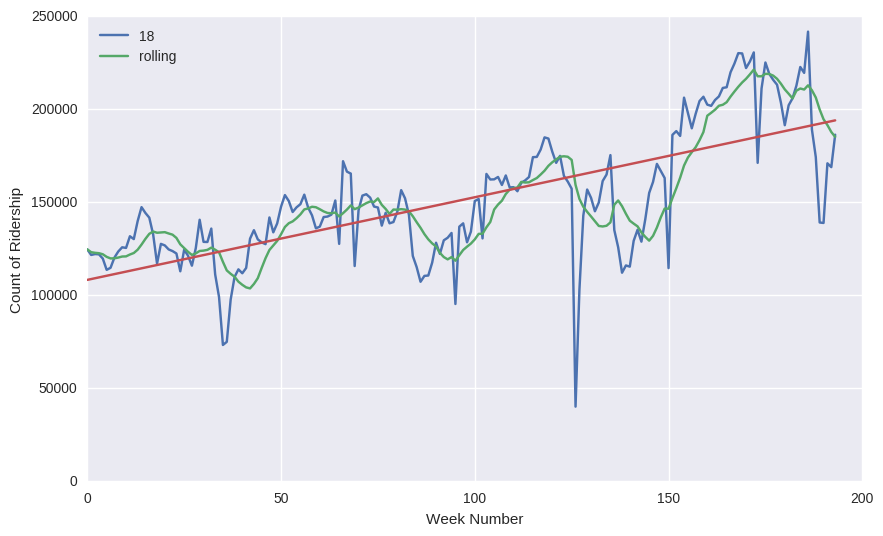

In [66]:
x = [i for i in range(0,194)]
k=1
#k = str(k)
for i in range(0, 20):
    df2 = pd.DataFrame(df1.iloc[:,i])
    df2['rolling'] = df1.iloc[:,i].rolling(window=10, min_periods=1).mean()
    model = sm.OLS(df2['rolling'], sm.add_constant(x)).fit()
    if model.rsquared > .6:
        pl.figure(figsize=(10,6))
        pl.ylabel('Count of Ridership')
        pl.xlabel('Week Number')
        #pl.title(str('Fig: ' + str(k) + '\n' + df1.columns[i]) + ' Subway Pass\n' + 'Least Sq regression = ' + 
        #str(model.rsquared) + '\nX1_coeff = ' + str((model.params)[1]), fontsize=14)
        pl.plot(x, df1.iloc[:,i])
        pl.plot(x, df2['rolling'])
        pl.plot(x, model.predict(sm.add_constant(x)))
        pl.legend(loc='best')
        k+=1

These plots show the increasing and decreasing trends in subway ridership for the selected subway card types between May 2010 and February 2014. 
(fig 1: 14 d subway pass, fog 2: 7 d subway pass, fig 3: monthly subway pass, fig 4: rr subway pass, fig 5: sen subway pass, fig 6: spec subway pass, fig 7: tcmc subway pass and fig 8: xbus subway pass).
The blue line shows the ridership for each subway card, the green lines indicates the rolling mean of 10 stations, and the red line plots an OLS regression of the rolling mean. After comparing the ratio of both the first and last 10 weeks, it is only possible to identify the rate of change over time. However, it is not possible to perceive a clear trend in subway ridership. So, I only looked at stations which had an average change in ridership greater than 1.05 or less than 0.95 and only the stations whose least square regression values were greater than 0.6.
This data shows that the only card type whose ridership presented a decreasing trend was the unlimited monthly pass.

In [59]:
i = 0
annuals = []
for i in range(0,600):
    elem = np.abs(np.fft.rfft(mta_all[i]))[4]
    annuals.append(elem)
    i+=1

In [60]:
station_key = [i for i in range(0,601)]

In [61]:
sorted_annual = sorted(annuals, key=float)

In [62]:
print(sorted_annual[596:])

[2402218.5809588572, 2931895.8769513383, 2950388.929214194, 2980160.6355953491]


In [63]:
week_stations = dict(zip(station_key, annuals))
#print(week_stations)

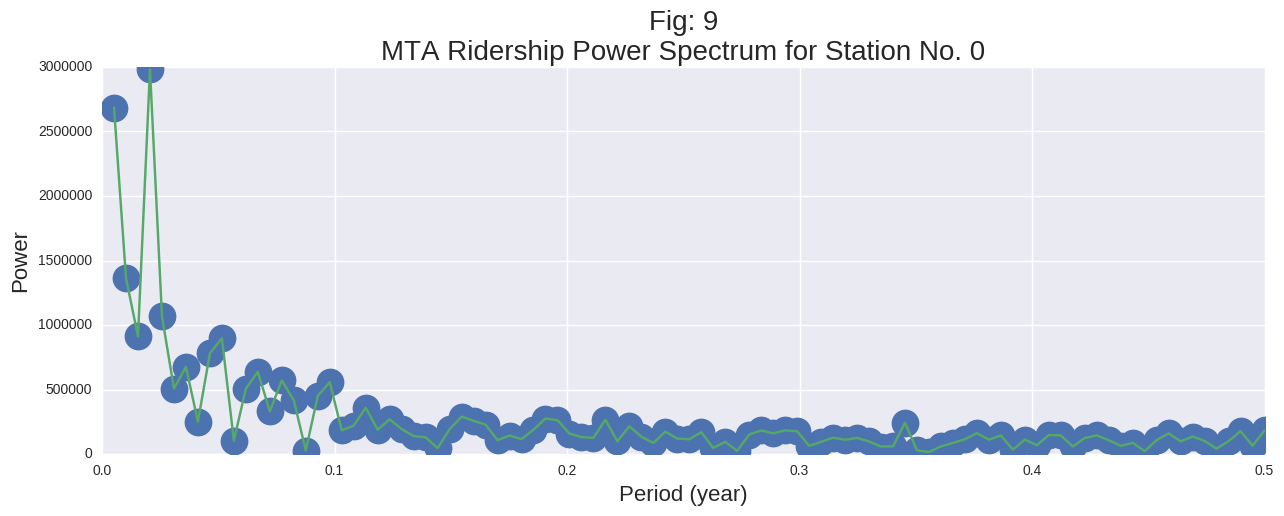

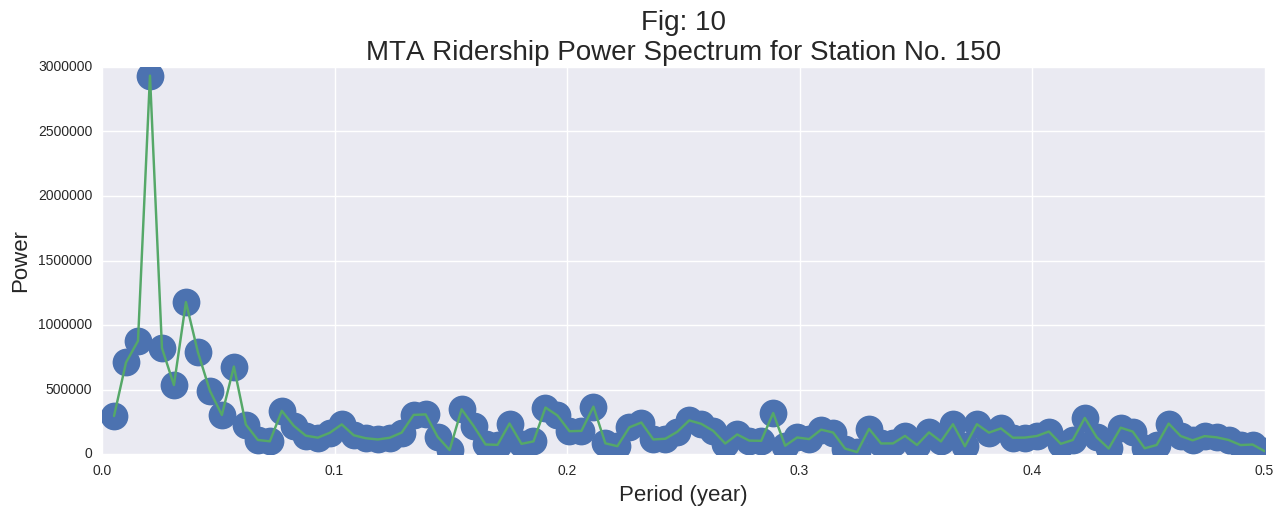

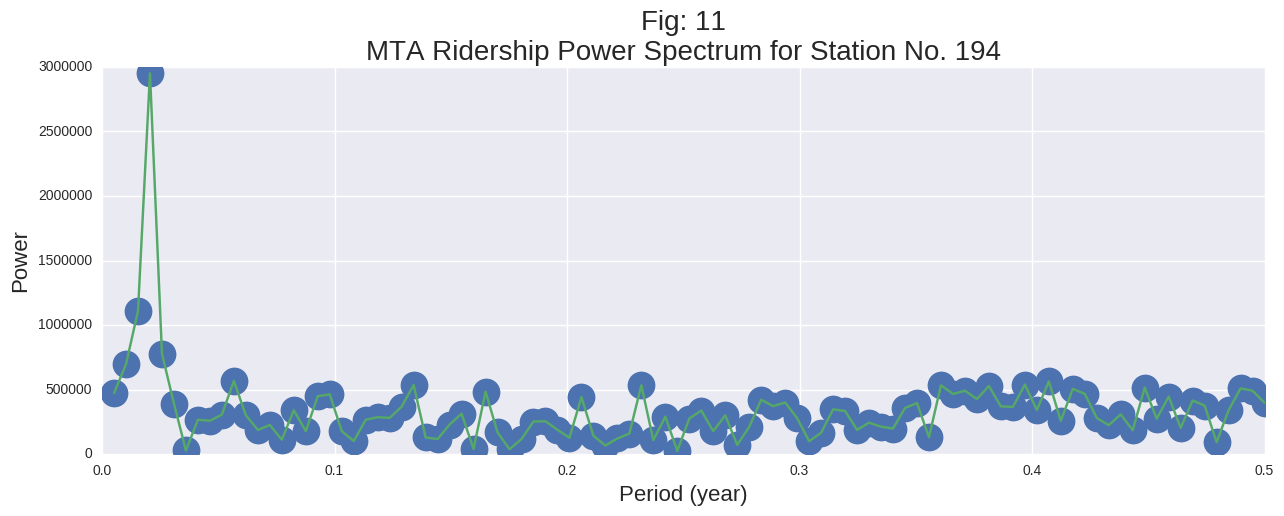

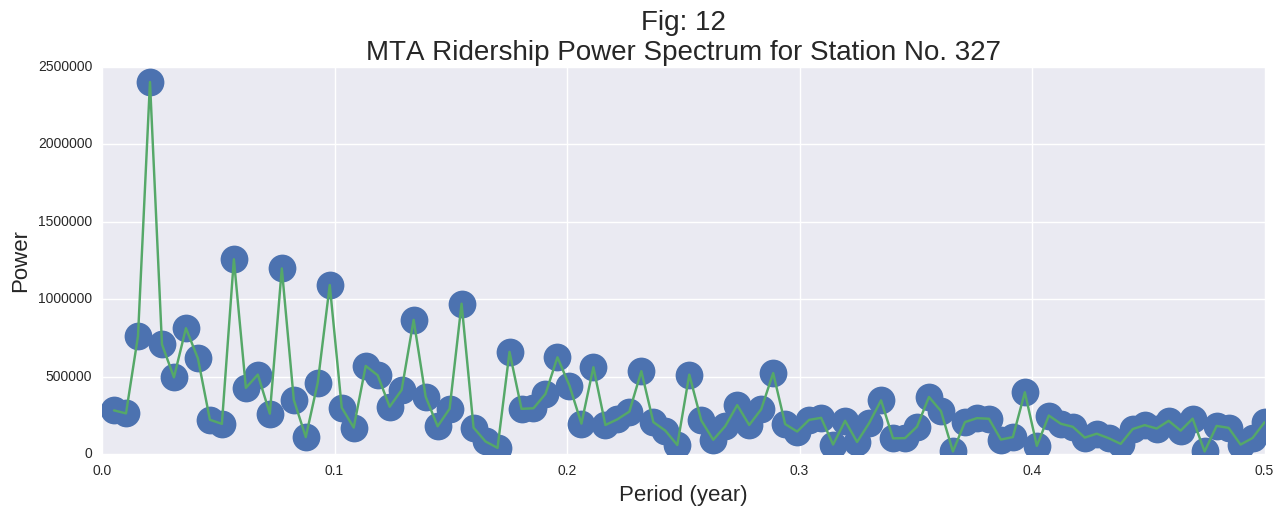

In [65]:
N = 194
stations = [0, 150, 194, 327]
k = 9
for elem in stations:
    f = np.abs(np.fft.rfft(mta_all[elem]))
    fig=pl.figure(figsize=(15,5))
    ax=fig.add_subplot(111)
    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), 'o', ms=20)
    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
    pl.xlabel('Period (year)', fontsize=16)
    pl.ylabel('Power', fontsize=16)
    pl.title('Fig: ' + str(k) + '\n' + 'MTA Ridership Power Spectrum for Station No. ' + str(elem), fontsize=20)
    k+=1

Caption:
The plots above display the information of the stations with highest ridership per year (0, 150, 194 and 237).